In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [68]:
df=pd.read_csv('DM2425_ABCDEats_DATASET (1).csv',delimiter=',')

#Drop Dublicates

We need to eliminate duplicates to prevent further issues, especially with the index setting

In [69]:
df.duplicated().sum()

13

In [70]:
df=df.drop_duplicates()
# Count the number of remaining duplicate rows in the DataFrame after dropping duplicates
df.duplicated().sum()

0

# Set costumer_id as the index

In [71]:
df.set_index('customer_id', inplace=True)

## Fixing variables

**costumer_age**

Fill missing values with median

In [72]:
df['customer_age'].isna().sum()

727

In [73]:
df['customer_age'] = df['customer_age'].fillna(df['customer_age'].median())
df['customer_age'].isna().sum()

0

**costumer_region**

Replace the value of '-' with 'Unknown' to enhance the interpretation of the feature

In [74]:
df.loc[:, 'customer_region'] = df['customer_region'].replace('-', 'Unknown')

**product_count**

There is an extreme product count value with '92ced2dcb9' index, so we will transform it into a high value

In [75]:
df.loc['92ced2dcb9','product_count']=100

**first_order**

Fill missing values with median

In [76]:
df['first_order'] = df['first_order'].fillna(df['first_order'].median())

**last_promo**

Replace the value of '-' with 'no_promotion_used' to enhance the interpretation of the feature

In [77]:
df['last_promo'] = df['last_promo'].replace('-', 'no_promotion_used')

**HR_0**

Drop the column labeled "HR_0" because it contains only zeros.

In [78]:
df.drop(columns=['HR_0'], inplace=True)

#Fixing inconsistencies

Eliminate rows where there are inconsistencies

In [79]:
df['sum_HR']=df['HR_1']+df['HR_2']+df['HR_3']+df['HR_4']+df['HR_5']+df['HR_6']+df['HR_7']+df['HR_8']+df['HR_9']+df['HR_10']+df['HR_11']+df['HR_12']+df['HR_13']+df['HR_14']+df['HR_15']+df['HR_16']+df['HR_17']+df['HR_18']+df['HR_19']+df['HR_20']+df['HR_21']+df['HR_22']+df['HR_23']
df['sum_DOW']=df['DOW_0']+df['DOW_1']+df['DOW_2']+df['DOW_3']+df['DOW_4']+df['DOW_5']+df['DOW_6']
df['inc_0']=(df['sum_HR']!=df['sum_DOW'])
df['inc_2']=(df['product_count']==0)
df = df.loc[~(df['inc_0'] | df['inc_2'])]
df = df.drop(columns=['sum_HR', 'sum_DOW', 'inc_0', 'inc_2'])

# New variables

**Total_Spent**

In [80]:
cuisine = [col for col in df.columns if col.startswith('CUI_')]

In [81]:
df['Total_Spent']=df[cuisine].sum(axis=1)

Deal with extreme outliers

In [82]:
df = df.drop('92ced2dcb9', axis=0)
df.loc['249ba584d3','CUI_Asian']=500
df.loc['8d65421423','CUI_Japanese']=590
df['Total_Spent']=df[cuisine].sum(axis=1)

**Order_Count**

In [83]:
df['order_count']=df['DOW_0']+df['DOW_1']+df['DOW_2']+df['DOW_3']+df['DOW_4']+df['DOW_5']+df['DOW_6']

**Diversity_Cuisine**

In [84]:
df['Diversity_Cuisine'] = (df[cuisine] > 0).sum(axis=1)
df['Diversity_Cuisine'] = df['order_count']/df['Diversity_Cuisine']

**Costumer_time**

In [85]:
df['costumer_time']=df['last_order']-df['first_order']

**Intensity_of_Activity**

In [86]:
df['Intensity_of_Activity'] = df['costumer_time'] / df['order_count']

**Customer_Loyalty**

In [87]:
df['Customer_loyalty'] = df['vendor_count'] / df['order_count']

**Product_Intensity**

In [88]:
df['product_intensity'] = df['product_count'] / df['order_count']

**Day_Week_Spread**

In [89]:
days = [col for col in df.columns if col.startswith('DOW_')]

In [90]:
df['Day_Week_Spread'] = df.loc[:,days].var(axis=1)

**hour_spread**

In [91]:
hours=[col for col in df.columns if col.startswith('HR_')]

In [64]:
df['hour_spread'] = df.loc[:,hours].var(axis=1)

In [93]:
df.to_csv('df_Clean.csv')

# Normalize data

In [94]:
#Select numeric features
metric_features = df.select_dtypes(include=['number']).columns.tolist()

In [95]:
# Normalize numeric data with Min-Max scaler
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df[metric_features])
df[metric_features] = scaled_feat

In [96]:
#Select categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [98]:
# Normalize categorical features with OneHotEncoder scaler
ohc = OneHotEncoder(sparse_output=False, drop="first")
ohc_feat = ohc.fit_transform(df[categorical_features])
ohc_feat_names = ohc.get_feature_names_out()
#Saving the normalized categorical features in a dataframe named ohc_df
ohc_df = pd.DataFrame(ohc_feat, index=df.index, columns=ohc_feat_names)
ohc_df

,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_no_promotion_used,payment_method_CASH,payment_method_DIGI
customer_id,,,,,,,,,,,,,
1b8f824d5e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5d272b9dcb,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
f6d1b2ba63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
180c632ed8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4eb37a6705,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
f6b6709018,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
f74ad8ce3f,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


#PCA analisys

In [109]:
X = df[metric_features]
pca = PCA().fit(X)

In [110]:
PCA_s=pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)
PCA_s.head(20)

,Eigenvalue,Difference,Proportion,Cumulative
1,0.158220,0.000000,0.412539,0.412539
2,0.085737,-0.072484,0.223547,0.636086
3,0.043981,-0.041756,0.114675,0.750761
4,0.020792,-0.023189,0.054213,0.804974
5,0.011896,-0.008897,0.031016,0.835990
6,0.007861,-0.004034,0.020497,0.856488
7,0.004534,-0.003327,0.011822,0.868309
8,0.003641,-0.000893,0.009492,0.877802
9,0.003170,-0.000471,0.008265,0.886066
10,0.002890,-0.000280,0.007535,0.893601


In [111]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)
print(loadings)

                               PC1       PC2       PC3       PC4       PC5  \
customer_age              0.001958  0.004013 -0.006755 -0.001083  0.999812   
vendor_count              0.103828  0.007049  0.033708 -0.317998 -0.002069   
product_count             0.095700  0.009162 -0.065607 -0.261185 -0.000849   
is_chain                  0.067850  0.003499 -0.039724 -0.189114 -0.003199   
first_order              -0.446238  0.690830 -0.145157 -0.025329 -0.003646   
last_order                0.359171  0.719288  0.202665  0.024806 -0.001446   
CUI_American              0.029059  0.002160 -0.020624 -0.058444  0.002081   
CUI_Asian                 0.021610  0.005565  0.001709 -0.067894  0.006129   
CUI_Beverages             0.011951  0.000563  0.000340 -0.047126 -0.001571   
CUI_Cafe                  0.007446  0.001285 -0.009373 -0.027600  0.000713   
CUI_Chicken Dishes        0.006693 -0.000105 -0.002429 -0.020669 -0.000324   
CUI_Chinese               0.006539  0.000507 -0.004073 -0.021029

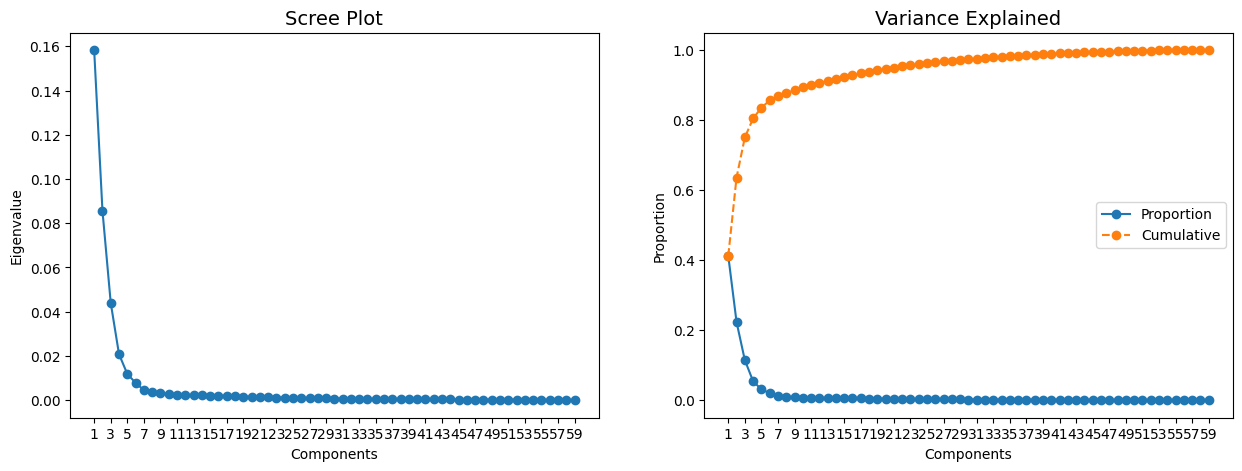

In [112]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

We decided to establish a threshold of 85% cumulative variance, so we will retain the first 6 components

In [114]:
#Retain the first 6 components
pca = PCA(n_components=6)
pca_feat = pca.fit_transform(df[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
#Create the dataframe "df_PCA" with the PC`s and the normalized categorical features
df_PCA = pd.DataFrame(pca_feat, index=df.index, columns=pca_feat_names)
df_PCA=pd.concat([df_PCA,ohc_df],axis=1)
#Normalize the PC features
metric_features1 = df_PCA.select_dtypes(include=['number']).columns.tolist()
scaled_feat = scaler.fit_transform(df_PCA[metric_features1])
df_PCA = scaled_feat
df_PCA = pd.DataFrame(df_PCA, index=df.index, columns=metric_features1)

In [116]:
df_PCA.to_csv('df_PCA.csv')